In [11]:
#attach packages
library(repr)
library(tidyverse)
library(tidymodels)

options(repr.matrix.max.rows = 6)




In [12]:

dataset <- read_csv("https://drive.google.com/uc?export=download&id=1m1oh8R2D0EGajeNJdoHUu-jHjQy3w_3e")
#renames the columns and gets rid of the spaces
colnames(dataset)<- c('fix_acid','vol_acid','citric_acid','resid_sugar','chlorides','free_sugar_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality','id')
upd <- dataset %>%
#turns quality variable into a factor
         mutate(quality = as_factor(quality))

#moves ID column at the beginning 
updated_dataset <- upd[,c(13,1,2,3,4,5,6,7,8,9,10,11,12)]
updated_dataset


Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



id,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sugar_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [13]:
#set seed (only once)
set.seed(1234)

wine_split <- initial_split(updated_dataset, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

wine_train

id,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sugar_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [14]:
wine_summarize <- wine_train%>% 
                       group_by(quality)%>%
                       summarise(vol_acid_avg = median(vol_acid), alcohol_avg = median(alcohol), total_sulfur_dioxide_avg = median(total_sulfur_dioxide),sulphates_avg = median(sulphates), density_avg = median(density), count = n())


                        
#The quality distribution falls into the Gaussian normal distribution

#We see that median volatile acidity decreases as quality increases, while median alcohol content and total sulpher dioxide increase with quality
wine_summarize

`summarise()` ungrouping output (override with `.groups` argument)



quality,vol_acid_avg,alcohol_avg,total_sulfur_dioxide_avg,sulphates_avg,density_avg,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,0.875,9.95,14.0,0.550,0.99705,5
4,0.670,9.95,44.5,0.565,0.99660,26
5,0.590,9.60,47.0,0.570,0.99693,365
6,0.500,10.50,35.0,0.640,0.99652,344
7,0.370,11.50,28.0,0.740,0.99570,108
8,0.340,11.50,16.5,0.790,0.99620,10


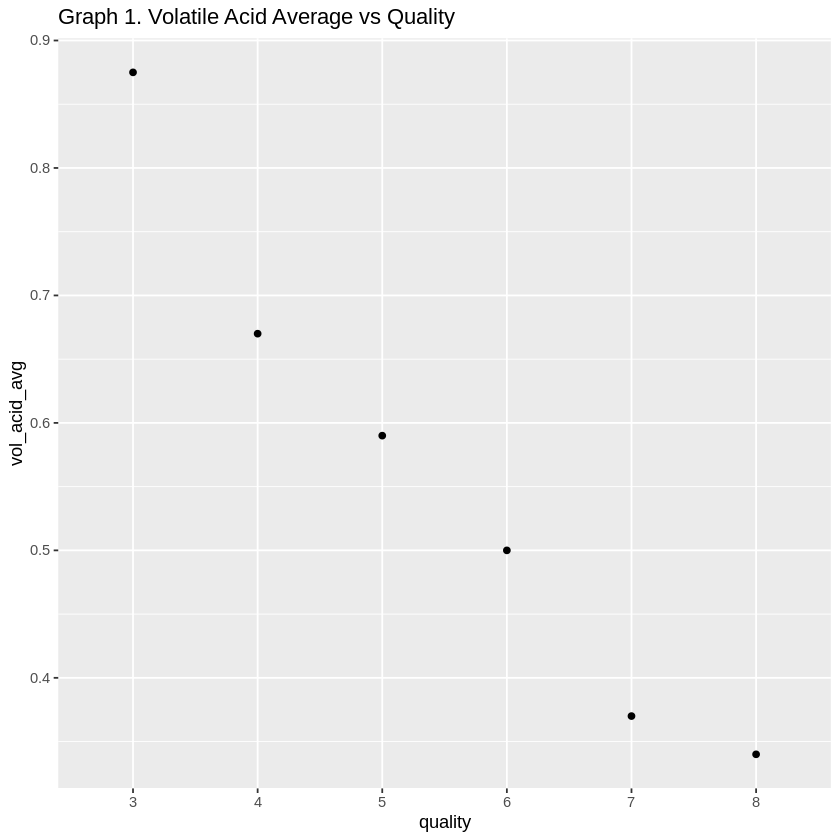

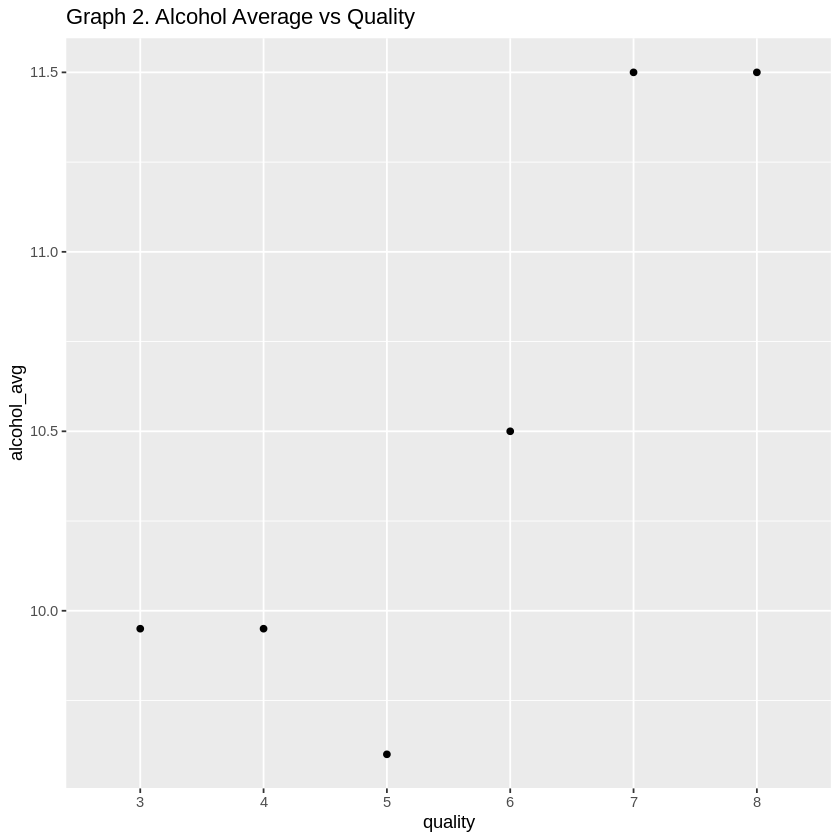

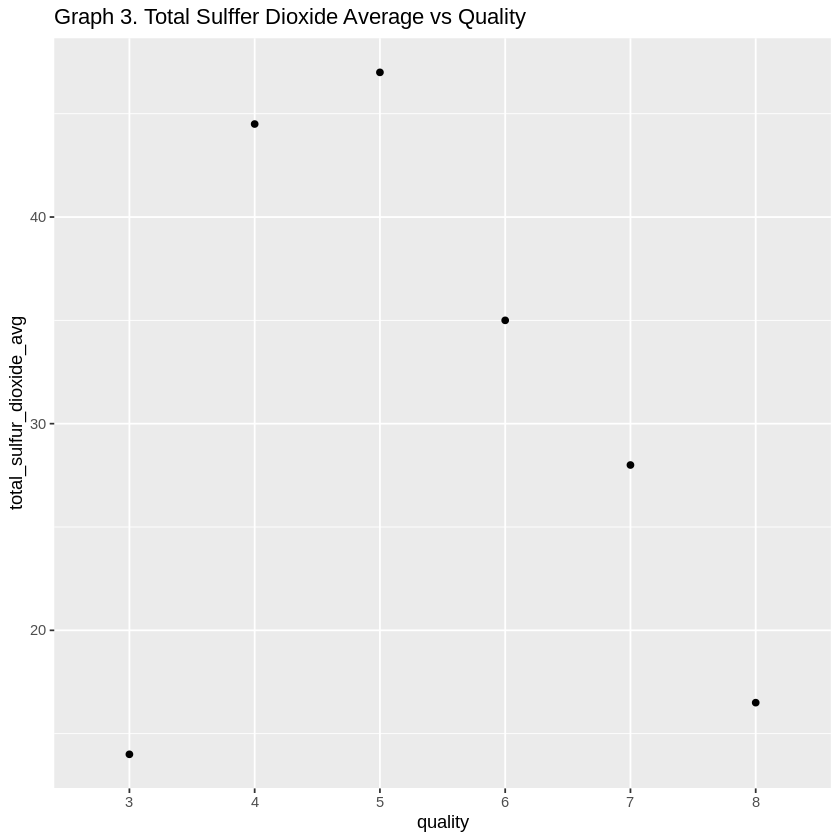

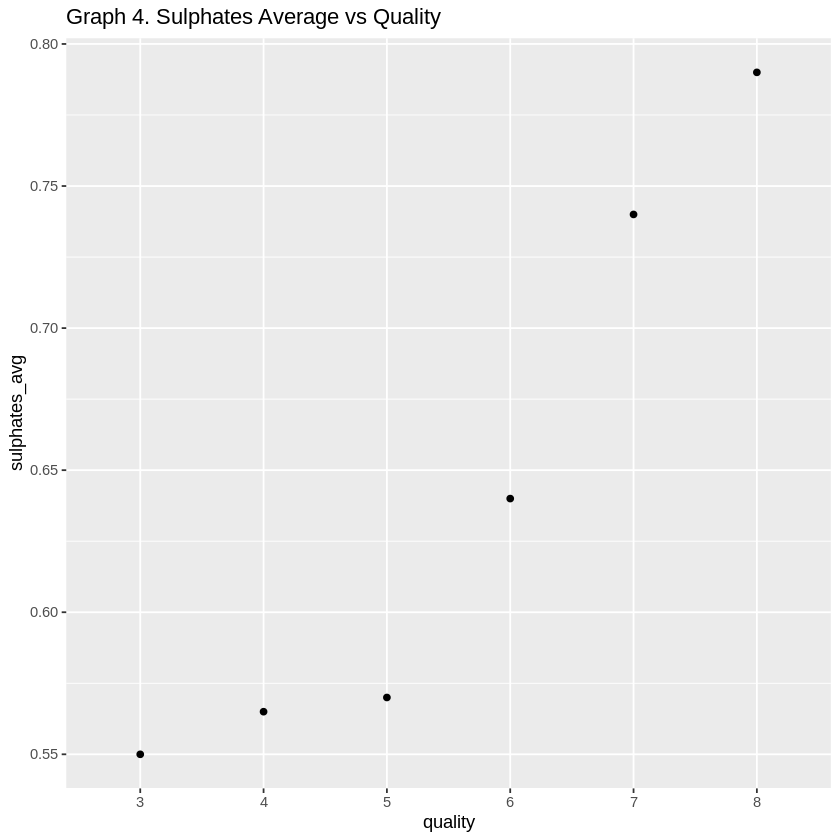

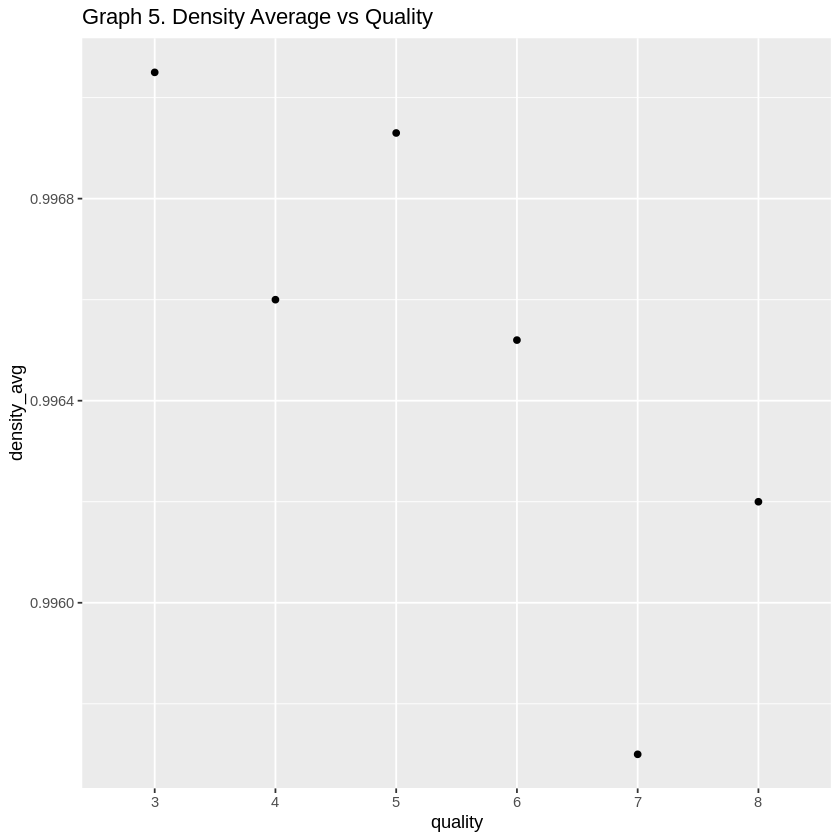

In [15]:
#visualization of the above table. All predictors appear to have some correlation to quality

vol_acid_graph <- ggplot(wine_summarize, aes(x=quality, y=vol_acid_avg))+
    geom_point()+
    ggtitle("Graph 1. Volatile Acid Average vs Quality")
vol_acid_graph

alcohol_graph <- ggplot(wine_summarize, aes(x=quality, y=alcohol_avg))+
    geom_point()+
     ggtitle("Graph 2. Alcohol Average vs Quality")
alcohol_graph 

total_sulfer_dioxide_graph <- ggplot(wine_summarize, aes(x=quality, y=total_sulfur_dioxide_avg))+
    geom_point()+
 ggtitle("Graph 3. Total Sulffer Dioxide Average vs Quality")
total_sulfer_dioxide_graph

sulphates_graph <- ggplot(wine_summarize, aes(x=quality, y=sulphates_avg))+
    geom_point()+
     ggtitle("Graph 4. Sulphates Average vs Quality")
sulphates_graph

density_graph <- ggplot(wine_summarize, aes(x=quality, y=density_avg))+
    geom_point()+
     ggtitle("Graph 5. Density Average vs Quality")
density_graph


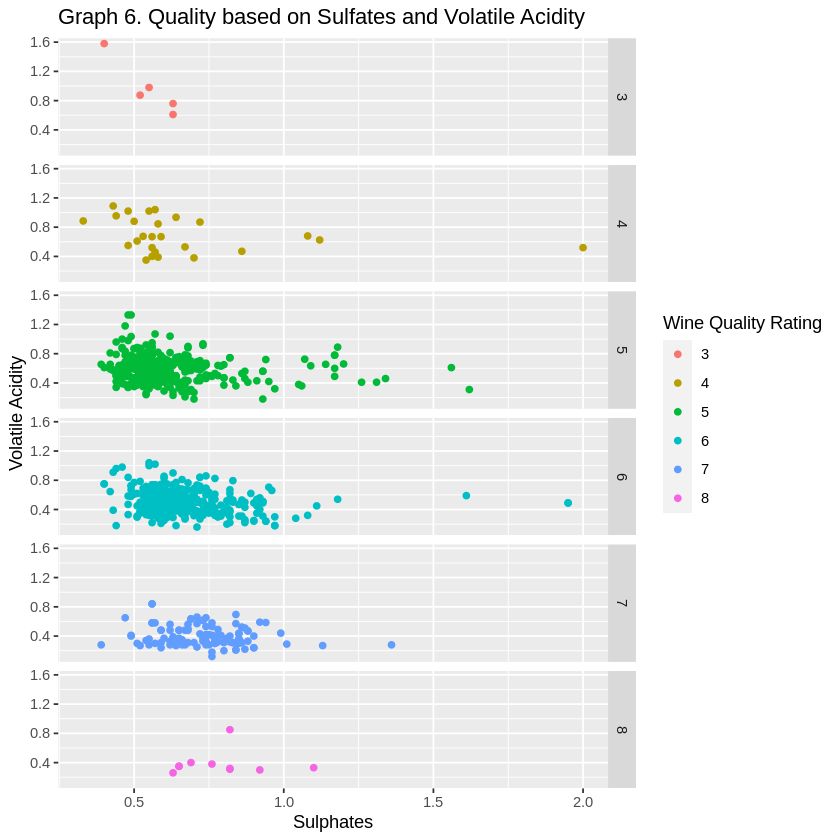

In [16]:
#Graph of volatile acid vs sulphates showing how these chemicals vary with the quality of the wine.
#Sulphates appear to increase in higher quality wine, while volatile acid appears to decrease with quality

data_visualization <- wine_train %>%
                     ggplot(aes(y = vol_acid, x = sulphates, color = quality))+
                     geom_point()+
                     labs(x="Sulphates", y="Volatile Acidity", color= "Wine Quality Rating")+
                     facet_grid(rows = vars(quality))+
                     ggtitle("Graph 6. Quality based on Sulfates and Volatile Acidity")

data_visualization

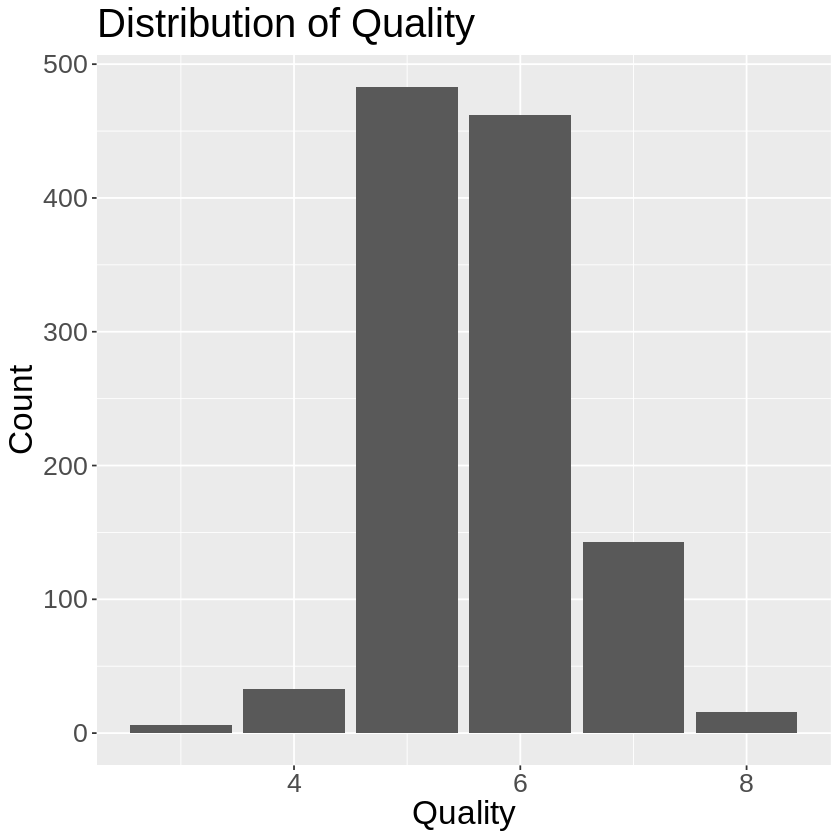

In [20]:
#This graph shows that the dataset includes many more medium quality wines than it does very good or very bad quality wines. 
#We may need to upsample to deal with this

bar_overall <- dataset%>%
                ggplot(aes(x = quality))+
                geom_bar(stat= "count")+
                labs(x = 'Quality', title = "Distribution of Quality", y = "Count")+
                theme(text = element_text(size = 20))
bar_overall

In [21]:
#Create model
wine_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

In [22]:
#create recipe
wine_recipe <- recipe(quality ~ vol_acid + alcohol + total_sulfur_dioxide + sulphates + density, data = wine_train)%>%
            step_scale(all_predictors()) %>%
            step_center(all_predictors()) 

wine_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [23]:
#5 fold cross validation
cross_val_data <- vfold_cv(wine_train, v=5, strata=quality)

#create grid specifications
sequence <- tibble(neighbors = seq(from=1, to=70, by=2))

In [ ]:
#tune grid
determining_k <- workflow()%>%
    add_recipe(wine_recipe)%>%
    add_model(wine_model)%>%
    tune_grid(resamples=cross_val_data, grid=sequence)%>%
    collect_metrics()%>%
    filter(.metric=="accuracy")

determining_k


! Fold1: internal: No observations were detected in `truth` for level(s): '3'
Com...



In [1]:
#graphs K vs accuracy to find best K
best_k <- ggplot(determining_k, aes(x=neighbors, y=mean))+
    geom_point()+
    geom_line()+
    labs(x="K Nearest Neighbours", y="Accuracy")+
    ggtitle("Number of Neighbors vs Accuracy")
best_k
#best K is 20

ERROR: Error in ggplot(determining_k, aes(x = neighbors, y = mean)): could not find function "ggplot"


In [ ]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 20)%>%
  set_engine("kknn")%>%
  set_mode("classification")

knn_fit <- workflow()%>%
  add_recipe(wine_recipe)%>%
  add_model(knn_spec)%>%
  fit(data = wine_train)

knn_fit

In [ ]:
wine_test_predictions <- predict(knn_fit, wine_test)%>%
                         bind_cols(wine_test)

wine_test_predictions

In [ ]:
wine_test_predictions%>%
  metrics(truth = quality, estimate = .pred_class)%>%
  filter(.metric == "accuracy")


In [ ]:
confusion <- wine_test_predictions%>%
             conf_mat(truth = quality, estimate = .pred_class)

confusion